In [326]:
#Imports
import pandas as pd
import numpy as np
#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [327]:
transac=pd.read_excel('Transaction dataset.xlsx')

In [328]:
#Description of numerical attributes of dataset, since most of the attributes are categoircal.
transac.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [329]:
transac.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [330]:
transac['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [331]:
#For each mode of transaction, there is only one status of transaction, either authorized or posted.
tran=transac[['status','txn_description']]
tran[tran['txn_description']=='PHONE BANK']['status'].unique()

array(['posted'], dtype=object)

In [332]:
tran['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [333]:
transac.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

# Cleaning and modifying the dataset

In [334]:
#Null values present in the dataset
transac.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

<AxesSubplot:>

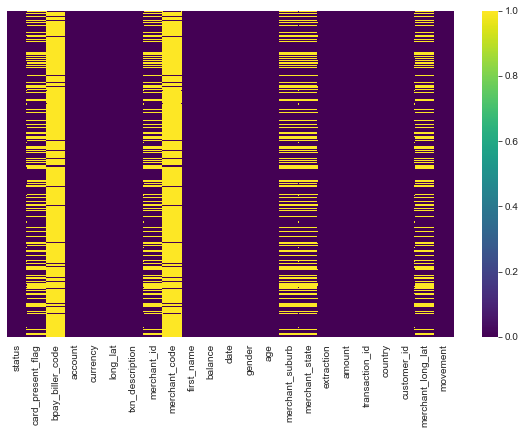

In [335]:
#Analyzing for null values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(transac.isnull(),cmap='viridis',yticklabels=False)

In [336]:
#Status of credit card transaction
transac['status'].unique()

array(['authorized', 'posted'], dtype=object)

In [337]:
transac['country'].nunique()
#There is only one country (Australia)

1

In [338]:
#Separating time from extraction column
Time =transac['extraction'].str.split('T',n=1,expand=True)
transac['time']=Time[1] 
transac.drop(columns =["extraction"], inplace = True) 

In [339]:
transac.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,amount,transaction_id,country,customer_id,merchant_long_lat,movement,time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15.000+0000
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45.000+0000
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15.000+0000
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45.000+0000
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15.000+0000


In [340]:
# Segmented time from datetime
Time =transac['time'].str.split('.',n=1,expand=True)
transac['Time']= Time[0]

In [341]:
transac.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,amount,transaction_id,country,customer_id,merchant_long_lat,movement,time,Time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15.000+0000,01:01:15
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45.000+0000,01:13:45
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15.000+0000,01:26:15
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45.000+0000,01:38:45
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15.000+0000,01:51:15


In [342]:
transac.drop('time',axis=1,inplace=True)

In [343]:
transac['trans_date']=transac['date']
transac['trans_time']=transac['Time']

In [344]:
#Extract month, day and week from datetime
transac['month']=transac['date'].dt.month
transac['week']=transac['date'].dt.week
transac['day']=transac['date'].dt.day_name()

<ipython-input-344-6650e957b587>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  transac['week']=transac['date'].dt.week


In [345]:
#Removing the columns affected heavily by null values,can't be imputed with suitable values or is not considered in our analysis 
transac.drop(['bpay_biller_code','long_lat','merchant_code','merchant_long_lat','merchant_id'],axis=1,inplace=True)

In [346]:
transac['merchant_state'].mode()

0    NSW
dtype: object

In [347]:
#Impute null values:
transac['card_present_flag']=transac['card_present_flag'].fillna(1.0)
transac['merchant_suburb']=transac['merchant_suburb'].fillna(value='Melbourne')
transac['merchant_state']=transac['merchant_state'].fillna(value='NSW')

In [348]:
#Cleaned the dataset
transac.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
txn_description      0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
amount               0
transaction_id       0
country              0
customer_id          0
movement             0
Time                 0
trans_date           0
trans_time           0
month                0
week                 0
day                  0
dtype: int64

In [349]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    12043 non-null  object        
 11  merchant_state     12043 non-null  object        
 12  amount             12043 non-null  float64       
 13  transaction_id     12043 non-null  object        
 14  countr

# INSIGHTS ON DATASET (VISUALIZATION)

In [350]:
#Transaction Volume and amount (Daywise transaction)
Daywise_trans=pd.DataFrame(transac.groupby('day')['customer_id'].count())
Daywise_avg_Exp=pd.DataFrame(transac.groupby('day')['amount'].mean())

Text(0.5, 1.0, 'Daywise transaction Volume')

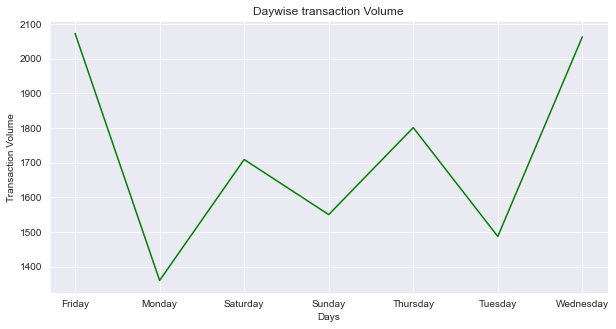

In [351]:
plt.figure(figsize=(10,5))
plt.plot(Daywise_trans,color='g')
plt.xlabel('Days')
plt.ylabel('Transaction Volume')
plt.title('Daywise transaction Volume')


Text(0.5, 1.0, 'Daywise Average Expenditure')

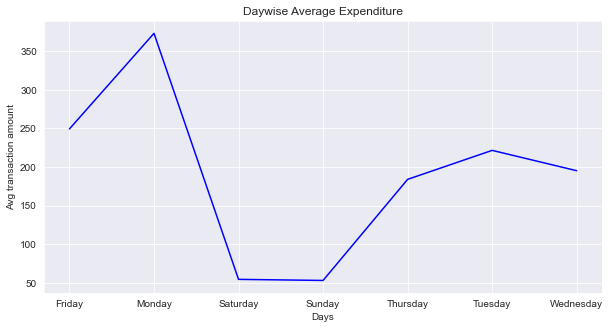

In [352]:
plt.figure(figsize=(10,5))
plt.plot(Daywise_avg_Exp,color='b')
plt.xlabel('Days')
plt.ylabel('Avg transaction amount')
plt.title('Daywise Average Expenditure')

Transaction Volume is least on Mondays and at peak on Fridays(almost weekend) and mid-week (Wednesday).

On an average, expenditure incurred is highest on Mondays even though the transaction Volume was least, suggesting that some of the expenses incurred on weekends could be cleared on the first Weekday,i.e: Monday or amount per transaction was higher on Monday on average.

In [353]:
#Overall amount per transaction on an average
Avg_trans_amnt= transac['amount'].mean()
Avg_trans_amnt

187.93358797641767

In [354]:
#Average amount per transaction by each customer
Average_Exp= pd.DataFrame(transac.groupby('customer_id')['amount'].mean())
Average_Exp.sort_values(by='amount',ascending=False)

,amount
customer_id,
CUS-495599312,693.632903
CUS-2738291516,567.614500
CUS-1816693151,515.583846
CUS-55310383,497.669474
CUS-3174332735,489.220980
...,...
CUS-3378712515,87.546000
CUS-2142601169,78.206106
CUS-860700529,77.681888


In [355]:
#Average volume of transaction each month
Average_month = pd.DataFrame(transac.groupby('month')['amount'].mean())
Average_month

,amount
month,
8,185.121867
9,182.045903
10,196.427323


Inference on the trend of average amount transacted:

Overall : On an average,amount transacted is 188 AUD per transaction. Can also be considered as the amount used each time by customer on average basis for their expenses.

Customer-Wise: Maximum stands at around 693 AUD while lowest around 45 AUD, high variability in terms of customer spending.

Month-Wise: Comparable in terms of average value of transactions.



In [356]:
#Monthly transaction Volume, not much relevant, has an increasing trend
Monthly_trans= pd.DataFrame(transac.groupby('month')['account'].count())
Monthly_trans

,account
month,
8,3943
9,4013
10,4087


<Figure size 720x432 with 0 Axes>

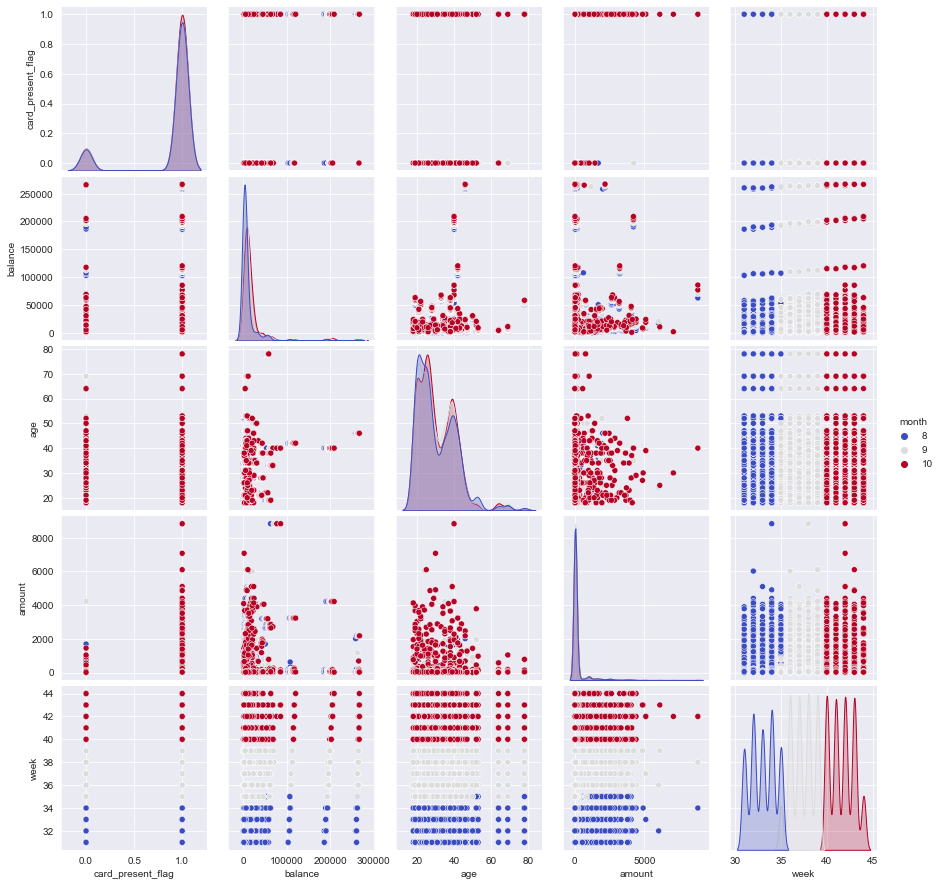

In [357]:
plt.figure(figsize=(10,6))
sns.pairplot(transac,hue='month',palette='coolwarm')

Pairplot helps us visualize the entire dataset on its entirety to analyze the dataset from an overall point of view and helps us to understand which pair of attrributes are more related and thus more insights can be drawn from

In [358]:
# Average transaction amount based on states
Avg_amnt_st=transac.groupby('merchant_state')['amount'].mean()
Avg_amnt_st

merchant_state
ACT     66.803836
NSW    316.464915
NT      44.726293
QLD     34.372397
SA      40.425470
TAS     28.866618
VIC     41.099953
WA      30.901873
Name: amount, dtype: float64

Text(0.5, 1.0, 'Transaction Expenses by state')

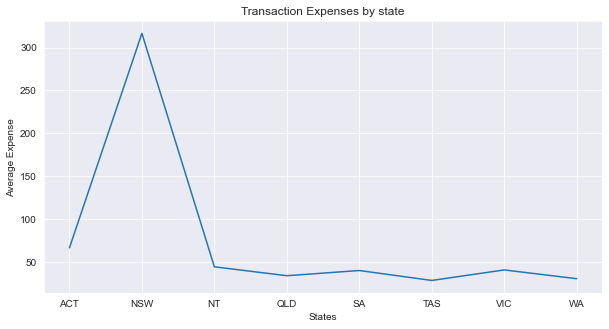

In [359]:
plt.figure(figsize=(10,5))
plt.plot(Avg_amnt_st)
plt.xlabel('States')
plt.ylabel('Average Expense')
plt.title('Transaction Expenses by state')

Average expenditure is highest at ACT (Australian Capital Territory) implying that it might be one of the affluent/ luxurious places in Australia. Lowest expenditure takes place at TAS (Tasmania).

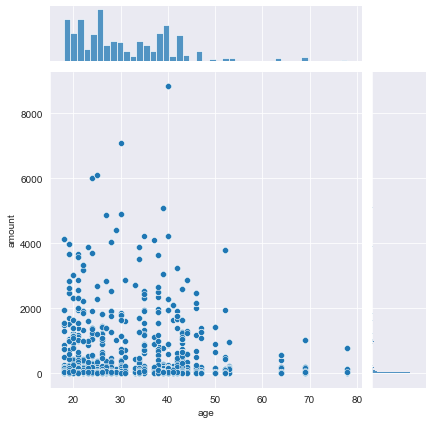

In [360]:
sns.jointplot(x='age',y='amount',data=transac,kind='scatter')

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='card_present_flag', ylabel='count'>

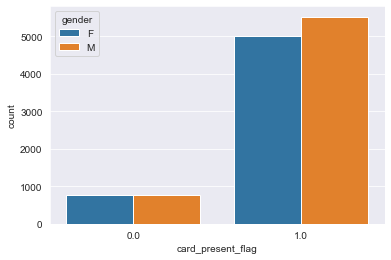

In [361]:
#Higher proportion of card transactions are flagged out of which males customers have a higher proportion
sns.countplot(transac['card_present_flag'],hue=transac['gender'])

In [362]:
#Analysing relationship between customer's age and their transaction activities by creating age-range
transac['age'].unique()

array([26, 38, 40, 20, 43, 27, 19, 23, 30, 46, 47, 24, 37, 25, 21, 39, 31,
       34, 18, 78, 22, 42, 33, 28, 44, 69, 35, 41, 53, 64, 50, 52, 29],
      dtype=int64)

In [363]:
plot=pd.concat([transac['card_present_flag'],transac['status'],transac['amount'],transac['age']],axis=1)

In [364]:
ages=pd.DataFrame(transac['age'])
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)

In [365]:
plot

,card_present_flag,status,amount,age
0,1.0,authorized,16.25,26
1,0.0,authorized,14.19,26
2,1.0,authorized,6.42,38
3,1.0,authorized,40.90,40
4,1.0,authorized,3.25,26
...,...,...,...,...
12038,0.0,authorized,9.79,30
12039,1.0,authorized,63.87,20
12040,1.0,authorized,43.96,28
12041,1.0,authorized,30.77,69


In [366]:
#Creating age range
ages_nodup=ages.drop_duplicates()

In [367]:
#plott=plot.merge(ages,on='age',how='inner')
#plott
plott=pd.merge(plot,ages_nodup,on='age')
plott

,card_present_flag,status,amount,age,agerange
0,1.0,authorized,16.25,26,18-29
1,0.0,authorized,14.19,26,18-29
2,1.0,authorized,3.25,26,18-29
3,1.0,posted,55.00,26,18-29
4,1.0,authorized,14.10,26,18-29
...,...,...,...,...,...
12038,1.0,posted,4405.30,29,18-29
12039,1.0,posted,43.00,29,18-29
12040,1.0,authorized,16.33,29,18-29
12041,1.0,posted,56.00,29,18-29


C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

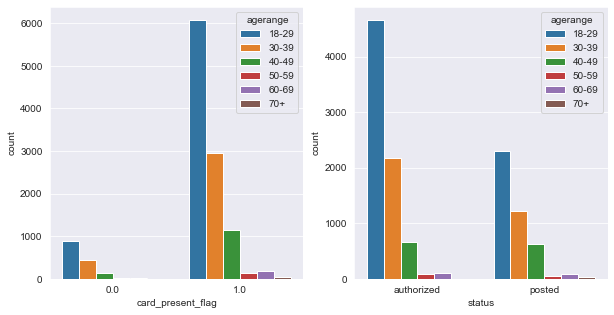

In [368]:
#Attributes with age
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(plott['card_present_flag'],hue=plott['agerange'],ax=axs[0])
sns.countplot(plott['status'],hue=plott['agerange'],ax=axs[1])

<AxesSubplot:xlabel='agerange', ylabel='amount'>

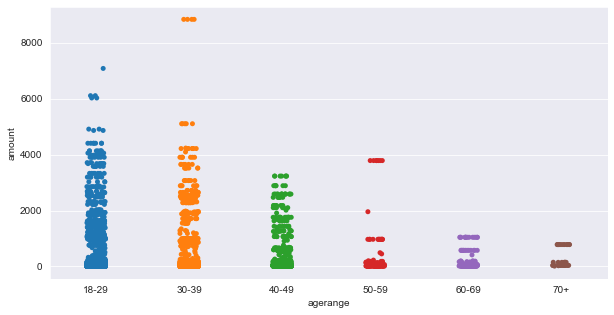

In [369]:
plt.figure(figsize=(10,5))
sns.stripplot(x='agerange',y='amount',data=plott)

Comparing various attributes with age group, it can be observed that 18-29 has maximum number of transactions as authorized as well as flagged as compared to other age group (significant difference), it can also be inferred that this age group is the active age group of the dataset.

Amount of transactions as categorized by age range:

Amount of transactions declines with age.

Highest amount of transaction takes place in the age range of 30-39,amongst the customer dataset provided, more like an outlier.On average, transaction amount varies from 0-4000 AUD over the period of 3 months. Majority of transactions are undertaken by customers within 20-50 age group

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

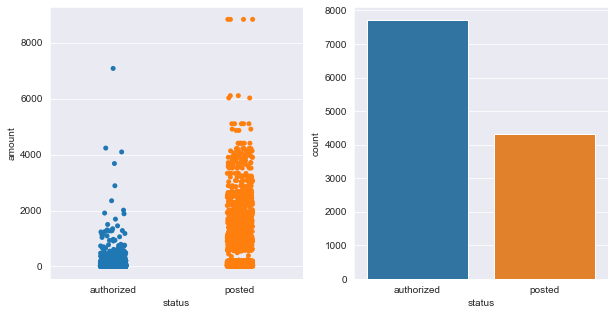

In [370]:
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.stripplot(x='status',y='amount',data=transac,ax=axs[0])
sns.countplot(transac['status'],ax=axs[1])

Higher proportion of transactions are authorized or yet to be settled and higher the amount of transaction, more the chances of amount getting posted.

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='movement', ylabel='amount'>

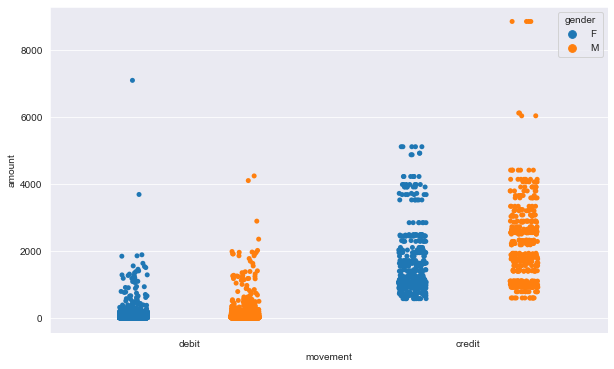

In [371]:
plt.figure(figsize=(10,6))
#sns.countplot(transac['movement'])
sns.stripplot(x='movement',y='amount',data=transac,hue='gender',split=True)

Lower transaction amounts are debit transactions while higher amount constitutes credit transactions

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_description', ylabel='count'>

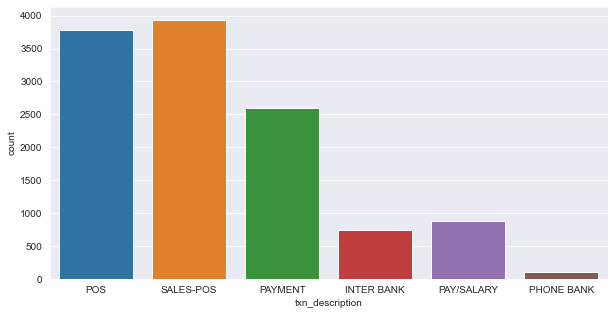

In [372]:
plt.figure(figsize=(10,5))
sns.countplot(transac['txn_description'])

Following chart shows mode of transaction, most commonly being used is the Sales Point of Sale, while Phone Bank method attracts the least attention. Thus, in order to improve customer satisfaction, focus should be towards developing POS means by providing the necessary infrastructure for seamless transaction experience at all retail/ merchant points

# Predictive Analysis

From the dataset, we can predict if the transaction is posted(transaction is cleared and charged in the credit card) or authorized(transaction is still pending).
Logistic regression will be applied as a model for prediction

In [373]:
# We convert categorical variables into dummy variables, drop first to prevent multicollinearity problem
status_=pd.get_dummies(transac['status'],drop_first=True)
movement_=pd.get_dummies(transac['movement'],drop_first=True)
way= pd.get_dummies(transac['txn_description'],drop_first=True)
gender=pd.get_dummies(transac['gender'],drop_first=True)
agerange=pd.get_dummies(plott['agerange'],drop_first=True)
Flagged=pd.get_dummies(transac['card_present_flag'],drop_first=True)
#account

In [374]:
Flagged.rename(columns={1.0: "Flagged"},inplace=True)
Flagged

,Flagged
0,1
1,0
2,1
3,1
4,1
...,...
12038,0
12039,1
12040,1
12041,1


In [375]:
transac_final=pd.concat([transac,way,gender,movement_,agerange,Flagged],axis=1)

In [376]:
transac_final=transac_final.dropna()
transac_final
#Authorized is labelled as 0 while posted as 1

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,...,POS,SALES-POS,M,debit,30-39,40-49,50-59,60-69,70+,Flagged
0,authorized,1.0,ACC-1598451071,AUD,POS,Diana,35.39,2018-08-01,F,26,...,1,0,0,1,0,0,0,0,0,1
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,Diana,21.20,2018-08-01,F,26,...,0,1,0,1,0,0,0,0,0,0
2,authorized,1.0,ACC-1222300524,AUD,POS,Michael,5.71,2018-08-01,M,38,...,1,0,1,1,0,0,0,0,0,1
3,authorized,1.0,ACC-1037050564,AUD,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,...,0,1,0,1,0,0,0,0,0,1
4,authorized,1.0,ACC-1598451071,AUD,SALES-POS,Diana,17.95,2018-08-01,F,26,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,POS,Melissa,14054.14,2018-10-31,F,30,...,1,0,0,1,0,0,0,0,0,0
12039,authorized,1.0,ACC-1608363396,AUD,SALES-POS,Robert,9137.79,2018-10-31,M,20,...,0,1,1,1,0,0,0,0,0,1
12040,authorized,1.0,ACC-3827517394,AUD,POS,Craig,45394.57,2018-10-31,M,28,...,1,0,1,1,0,0,0,0,0,1
12041,authorized,1.0,ACC-2920611728,AUD,SALES-POS,Tyler,11350.67,2018-10-31,M,69,...,0,1,1,1,0,0,0,0,0,1


In [377]:
#Converting card status into binary classification
def convert_binary (x):
    return x.map({'authorized': 1, "posted": 0})

In [378]:
transac_final['status']=transac['status'].map({'authorized':1,'posted':0})

In [379]:
transac_final.dropna(inplace=True)
transac_final

,status,card_present_flag,account,currency,txn_description,first_name,balance,date,gender,age,...,POS,SALES-POS,M,debit,30-39,40-49,50-59,60-69,70+,Flagged
0,1,1.0,ACC-1598451071,AUD,POS,Diana,35.39,2018-08-01,F,26,...,1,0,0,1,0,0,0,0,0,1
1,1,0.0,ACC-1598451071,AUD,SALES-POS,Diana,21.20,2018-08-01,F,26,...,0,1,0,1,0,0,0,0,0,0
2,1,1.0,ACC-1222300524,AUD,POS,Michael,5.71,2018-08-01,M,38,...,1,0,1,1,0,0,0,0,0,1
3,1,1.0,ACC-1037050564,AUD,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,...,0,1,0,1,0,0,0,0,0,1
4,1,1.0,ACC-1598451071,AUD,SALES-POS,Diana,17.95,2018-08-01,F,26,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,1,0.0,ACC-3021093232,AUD,POS,Melissa,14054.14,2018-10-31,F,30,...,1,0,0,1,0,0,0,0,0,0
12039,1,1.0,ACC-1608363396,AUD,SALES-POS,Robert,9137.79,2018-10-31,M,20,...,0,1,1,1,0,0,0,0,0,1
12040,1,1.0,ACC-3827517394,AUD,POS,Craig,45394.57,2018-10-31,M,28,...,1,0,1,1,0,0,0,0,0,1
12041,1,1.0,ACC-2920611728,AUD,SALES-POS,Tyler,11350.67,2018-10-31,M,69,...,0,1,1,1,0,0,0,0,0,1


In [380]:
transac_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  int64         
 1   card_present_flag  12043 non-null  float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    12043 non-null  object        
 11  merchant_state     12043 non-null  object        
 12  amount             12043 non-null  float64       
 13  transaction_id     12043 non-null  object        
 14  countr

Logistic Regression

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
plott['agerange'].dtypes

CategoricalDtype(categories=['18-29', '30-39', '40-49', '50-59', '60-69', '70+'], ordered=True)

In [383]:
X= transac_final[['M','month','age','amount','balance','debit','Flagged']]
y=transac_final['status']

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

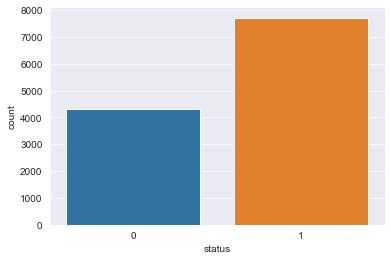

In [384]:
#Classification of target variable
sns.countplot(transac_final['status'])

In [385]:
#Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
ddf=add_constant(X)
pd.Series([variance_inflation_factor(ddf.values,i)
           for i in range(ddf.shape[1])],
         index=ddf.columns)

const      187.743875
M            1.008665
month        1.010059
age          1.046952
amount       2.969176
balance      1.067413
debit        2.973927
Flagged      1.013219
dtype: float64

In [386]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [387]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [388]:
lg.fit(X_train,y_train)

LogisticRegression()

In [389]:
#Predicting card status based on test data of X variables
predictions=lg.predict(X_test)

In [390]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [391]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.23      0.36      1316
           1       0.69      0.97      0.80      2297

    accuracy                           0.70      3613
   macro avg       0.74      0.60      0.58      3613
weighted avg       0.73      0.70      0.64      3613

[[ 304 1012]
 [  77 2220]]


In [392]:
lg.score(X_test,y_test)

0.6985884306670357

In [393]:
from sklearn.tree import DecisionTreeClassifier

In [394]:
dtree=DecisionTreeClassifier()

In [395]:
#Since tree based algorithms are robust to outliers
X1= transac_final[['M','debit','Flagged','age','month','amount','balance']]
y1=transac_final['status']

In [396]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.3)

In [397]:
dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [398]:
pred=dtree.predict(X1_test)

In [399]:
print(classification_report(y1_test,pred))
print(confusion_matrix(y1_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1305
           1       0.95      0.91      0.93      2308

    accuracy                           0.91      3613
   macro avg       0.90      0.91      0.91      3613
weighted avg       0.91      0.91      0.91      3613

[[1189  116]
 [ 201 2107]]


In [400]:
print('Accuracy_Score_Dtree:',dtree.score(X1_test,y1_test))

Accuracy_Score_Dtree: 0.9122612787157487


In [401]:
print('Accuracy_Score_Dtree:',dtree.score(X1_test,y1_test))

Accuracy_Score_Dtree: 0.9122612787157487


In [402]:
print('Accuracy_Score_Dtree:',dtree.score(X1_test,y1_test))
print('Accuracy_Score_Logistic:',lg.score(X_test,y_test))

Accuracy_Score_Dtree: 0.9122612787157487
Accuracy_Score_Logistic: 0.6985884306670357


In [403]:
#pred=pd.DataFrame(pred)
y1_test.reset_index(drop=True,inplace=True)
y1_test=pd.DataFrame(y1_test)
y1_test

,status
0,1
1,1
2,0
3,1
4,0
...,...
3608,0
3609,1
3610,1
3611,1


In [404]:
#Predictions
pred=pd.DataFrame(pred,columns=['Prediction'])
pred

,Prediction
0,1
1,0
2,0
3,1
4,0
...,...
3608,0
3609,0
3610,0
3611,1


In [405]:
#Prediction versus actual y
results=pd.concat([pred,y1_test],axis=1)
results

,Prediction,status
0,1,1
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
3608,0,0
3609,0,1
3610,0,1
3611,1,1


Decision Tree performs better than logistic regression